Make sure you use the right version number.

In [ ]:
# %pip install --upgrade scikit-learn==0.23.0
#

Once installed, we can load the data.

In [5]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

Next, we can apply models! 

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([206.11667725,  68.07103297, 176.88279035])

In [8]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([181.4,  80.8, 150.8])

Maybe we should inspect the results.

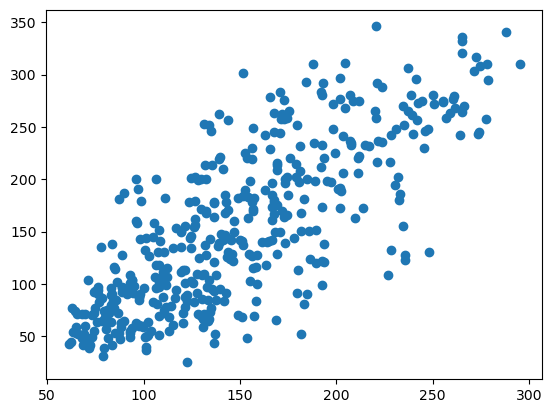

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_diabetes
import matplotlib.pylab as plt

X, y = load_diabetes(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

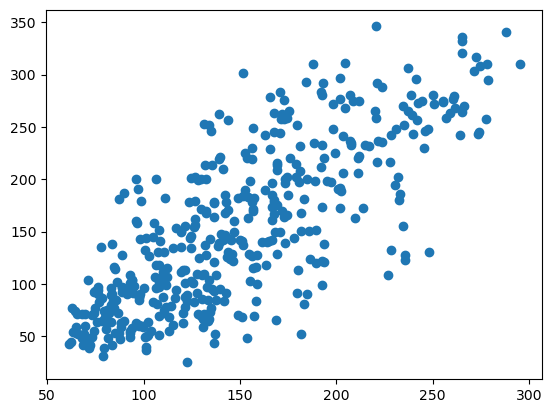

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_diabetes(return_X_y=True) 

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

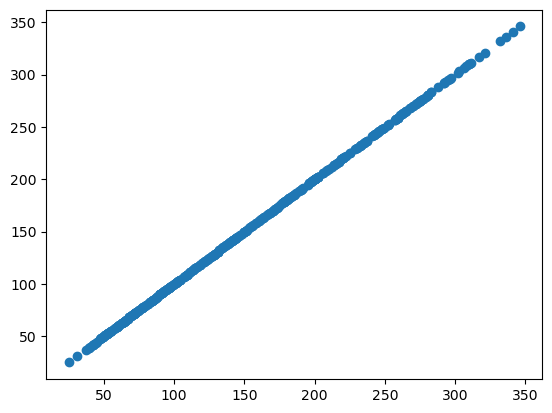

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_diabetes(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [14]:
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [15]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002306,1.204051e-03,0.002231,0.000222,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.001275,8.086253e-05,0.001488,0.000106,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.001082,5.114744e-06,0.001400,0.000006,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.001048,7.451826e-06,0.001402,0.000013,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.001054,1.074090e-05,0.001424,0.000014,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.001120,2.123339e-05,0.001542,0.000097,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.001048,5.800528e-05,0.001400,0.000004,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.001015,1.369334e-05,0.001694,0.000258,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.001054,8.501494e-05,0.001449,0.000012,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.000992,8.920806e-07,0.001476,0.000038,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


Finally, lets remember that we should look at the data.

In [16]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee